In [1]:
import ROOT as rt
import uproot
import h5py 

import numpy as np
import numpy.lib.recfunctions as nlr
import pandas as pd
import os, sys
from matplotlib import pyplot as plt
import math
import json

import gpustat
gpustat.print_gpustat()
os.environ['CUDA_VISIBLE_DEVICES']='3'

Welcome to JupyROOT 6.22/02
gpu-ibanks-1.hep.caltech.edu   Thu Aug 12 16:56:59 2021  470.57.02
[0] NVIDIA GeForce GTX TITAN X | 64'C,  27 % | 11528 / 12212 MB | schen7(11524M)
[1] NVIDIA GeForce GTX TITAN X | 33'C,   0 % |     1 / 12212 MB |


In [2]:
# Random Data Selection
def ran_data(num, total):
    sample_num = []
    for i in range(num):
        samp = np.random.randint(0, high=total+1)
        while samp in sample_num:
            samp = np.random.randint(0, high=total+1)
        sample_num.append(samp)
    return sample_num

def samp_to_df(samp_name, total_num):
    dfs = []
    for i in range(total_num+1):
        file_name = f'../HHbbggAna/condor/output/{samp_name}{i}.root'
        samp_file = uproot.open(file_name)
        samp_array = samp_file['tree'].arrays()
        samp_df = pd.DataFrame(samp_array)
        dfs.append(samp_df)
    combine_df = pd.concat(dfs, ignore_index=True)
    return combine_df

# Data loading
def data_to_df(job_run, samp_num):
    file_name = f'../HHbbggAna/condor/output/{job_run}/dataJob1ifile{samp_num}.root'
    data_file = uproot.open(file_name)
    data_array = data_file['tree'].arrays()
    data_df = pd.DataFrame(data_array)
    return data_df

In [3]:
# Load full data??
data_2018_full_dfs = []
for i in range(946):
    data_2018_full_dfs.append(data_to_df('job_1_ntuple20180805v1', i))
data_2018_full_df = pd.concat(data_2018_full_dfs, ignore_index=True)

data_2017_full_dfs = []
for i in range(261):
    data_2017_full_dfs.append(data_to_df('job_1_ntuple20170805v1', i))
data_2017_full_df = pd.concat(data_2017_full_dfs, ignore_index=True)

data_2016_full_dfs = []
for i in range(384):
    data_2016_full_dfs.append(data_to_df('job_1_ntuple20160805v1', i))
data_2016_full_df = pd.concat(data_2016_full_dfs, ignore_index=True)

In [4]:
# Set up dataframes - 2018 (recon == 1)

# Signals
GluGluToHH_df_2018 = samp_to_df('job_5_ntuple20180805v1/GluGluToHHTo2B2G_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8Job5ifile', 0)
VBFHH_df_2018 = samp_to_df('job_1_ntuple20180809v2/VBFHHTo2B2G_CV_1_C2V_1_C3_1_TuneCP5_PSWeights_13TeV-madgraph-pythia8Job1ifile', 2)

# Backgrounds
TTGJets_df_2018 = samp_to_df('job_2_ntuple20180805v1/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8Job2ifile', 19)
TTGG_0Jets_df_2018 = samp_to_df('job_3_ntuple20180805v1/TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8Job3ifile', 28)
TTJets_df_2018 = samp_to_df('job_4_ntuple20180805v1/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8Job4ifile', 304)
VHToGG_df_2018 = samp_to_df('job_6_ntuple20180805v1/VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8Job6ifile', 1)
ttHToGG_df_2018 = samp_to_df('job_7_ntuple20180805v1/ttHToGG_M125_TuneCP5_PSweights_13TeV-powheg-pythia8Job7ifile', 2)
VBFHToGG_df_2018 = samp_to_df('job_8_ntuple20180805v1/VBFHToGG_M125_13TeV_amcatnlo_pythia8Job8ifile', 4)
GluGluHToGG_df_2018 = samp_to_df('job_9_ntuple20180805v1/GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8Job9ifile', 3)
GJet_SmallPt_df_2018 = samp_to_df('job_10_ntuple20180805v1/GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job10ifile', 15)
GJet_BigPt_df_2018 = samp_to_df('job_11_ntuple20180805v1/GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job11ifile', 10)
DiPhotonJetsBox2B_df_2018 = samp_to_df('job_12_ntuple20180805v1/DiPhotonJetsBox2BJets_MGG-80toInf_13TeV-SherpaJob12ifile', 2)
DiPhotonJetsBox1B_df_2018 = samp_to_df('job_13_ntuple20180805v1/DiPhotonJetsBox1BJet_MGG-80toInf_13TeV-SherpaJob13ifile', 3)
DiPhotonJetsBox_df_2018 = samp_to_df('job_14_ntuple20180805v1/DiPhotonJetsBox_MGG-80toInf_13TeV-SherpaJob14ifile', 23)
QCD_Jets_df_2018 = samp_to_df('job_2_ntuple20180809v2/QCD_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job2ifile', 78)

In [5]:
# Set up dataframes - 2017 (recon == 1)

# Signals
GluGluToHH_df_2017 = samp_to_df('job_8_ntuple20170805v1/GluGluToHHTo2B2G_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8Job8ifile', 15)
VBFHH_df_2017 = samp_to_df('job_1_ntuple20170809v2/VBFHHTo2B2G_CV_1_C2V_1_C3_1_13TeV-madgraphJob1ifile', 6)

# Backgrounds
DiPhotonJetsBox1B_df_2017 = samp_to_df('job_2_ntuple20170805v1/DiPhotonJetsBox1BJet_MGG-80toInf_13TeV-SherpaJob2ifile', 15)
DiPhotonJetsBox2B_df_2017 = samp_to_df('job_3_ntuple20170805v1/DiPhotonJetsBox2BJets_MGG-80toInf_13TeV-SherpaJob3ifile', 25)
DiPhotonJetsBox_df_2017 = samp_to_df('job_4_ntuple20170805v1/DiPhotonJetsBox_MGG-80toInf_13TeV-SherpaJob4ifile', 83)
GJet_SmallPt_df_2017 = samp_to_df('job_5_ntuple20170805v1/GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job5ifile', 11)
GJet_BigPt_df_2017 = samp_to_df('job_6_ntuple20170805v1/GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job6ifile', 104)
GluGluHToGG_df_2017 = samp_to_df('job_7_ntuple20170805v1/GluGluHToGG_M-125_13TeV_powheg_pythia8Job7ifile', 1)
TTGG_0Jets_df_2017 = samp_to_df('job_9_ntuple20170805v1/TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8Job9ifile', 8)
TTGJets_df_2017 = samp_to_df('job_10_ntuple20170805v1/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8Job10ifile', 53)
TTJets_df_2017 = samp_to_df('job_11_ntuple20170805v1/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8Job11ifile', 194)
VBFHToGG_df_2017 = samp_to_df('job_12_ntuple20170805v1/VBFHToGG_M-125_13TeV_powheg_pythia8Job12ifile', 11)
VHToGG_df_2017 = samp_to_df('job_13_ntuple20170805v1/VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8Job13ifile', 0)
ttHToGG_df_2017 = samp_to_df('job_14_ntuple20170805v1/ttHToGG_M125_13TeV_powheg_pythia8Job14ifile', 3)
QCD_Jets_df_2017 = samp_to_df('job_2_ntuple20180809v2/QCD_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job2ifile', 18)

In [6]:
# Set up dataframes - 2016 (recon == 1)

# Signals
GluGluToHH_df_2016 = samp_to_df('job_8_ntuple20160805v1/GluGluToHHTo2B2G_node_cHHH1_TuneCUETP8M1_PSWeights_13TeV-powheg-pythia8Job8ifile', 3)
VBFHH_df_2016 = samp_to_df('job_1_ntuple20160809v2/VBFHHTo2B2G_CV_1_C2V_1_C3_1_13TeV-madgraphJob1ifile', 0)

# Background
DiPhotonJetsBox1B_df_2016 = samp_to_df('job_2_ntuple20160805v1/DiPhotonJetsBox1BJet_MGG-80toInf_TuneSherpa_13TeV-SherpaJob2ifile', 17)
DiPhotonJetsBox2B_df_2016 = samp_to_df('job_3_ntuple20160805v1/DiPhotonJetsBox2BJets_MGG-80toInf_TuneSherpa_13TeV-SherpaJob3ifile', 23)
DiPhotonJetsBox_df_2016 = samp_to_df('job_4_ntuple20160805v1/DiPhotonJetsBox_MGG-80toInf_13TeV-SherpaJob4ifile', 48)
GJet_SmallPt_df_2016 = samp_to_df('job_5_ntuple20160805v1/GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8Job5ifile', 13)
GJet_BigPt_df_2016 = samp_to_df('job_6_ntuple20160805v1/GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8Job6ifile', 64)
GluGluHToGG_df_2016 = samp_to_df('job_7_ntuple20160805v1/GluGluHToGG_M125_13TeV_amcatnloFXFX_pythiaJob7ifile', 0)
TTGG_0Jets_df_2016 = samp_to_df('job_9_ntuple20160805v1/TTGG_0Jets_TuneCUETP8M1_13TeV_amcatnlo_madspin_pythia8Job9ifile', 2)
TTGJets_df_2016 = samp_to_df('job_10_ntuple20160805v1/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8Job10ifile', 12)
TTJets_df_2016 = samp_to_df('job_11_ntuple20160805v1/TTJets_TuneCUETP8M2T4_13TeV-amcatnloFXFX-pythia8Job11ifile', 43)
VBFHToGG_df_2016 = samp_to_df('job_12_ntuple20160805v1/VBFHToGG_M125_13TeV_amcatnlo_pythia8_v2Job12ifile', 11)
VHToGG_df_2016 = samp_to_df('job_13_ntuple20160805v1/VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8Job13ifile', 1)
ttHToGG_df_2016 = samp_to_df('job_14_ntuple20160805v1/ttHToGG_M125_13TeV_powheg_pythia8_v2Job14ifile', 0)
QCD_Jets_df_2016 = samp_to_df('job_2_ntuple20160809v2/QCD_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8Job2ifile', 15)

In [7]:
# Good luminosity functions

def convert_json_txt_to_dict(file_name):
    with open(file_name) as file:
        data = file.read()
    return json.loads(data)

def good_lumi_list(data_df, good_lumi_dict):
    good_lumis = []
    for index, row in data_df.iterrows():
        run = row[b'run']
        lumi = row[b'lumi']
        good_lumi = 0
        if str(int(run)) in good_lumi_dict:
            lumi_blocks = good_lumi_dict[str(int(run))]
            for lumi_block in lumi_blocks:
                if lumi_block[0] <= lumi and lumi <= lumi_block[1]:
                    good_lumi = 1
                    break
        good_lumis.append(good_lumi)
    return good_lumis

In [8]:
# Get good luminosity dictionaries

Good_Lum_2018 = convert_json_txt_to_dict('../HHbbggAna/data/GoodRunJSON/Cert_314472-325175_13TeV_17SeptEarlyReReco2018ABC_PromptEraD_Collisions18_JSON.txt')
Good_Lum_2017 = convert_json_txt_to_dict('../HHbbggAna/data/GoodRunJSON/Cert_294927-306462_13TeV_EOY2017ReReco_Collisions17_JSON_v1.txt')
Good_Lum_2016 = convert_json_txt_to_dict('../HHbbggAna/data/GoodRunJSON/Cert_271036-284044_13TeV_ReReco_07Aug2017_Collisions16_JSON.txt')

In [9]:
# Good luminosity selection

data_2018_full_df[b'good_lumi'] = good_lumi_list(data_2018_full_df, Good_Lum_2018)
data_2018_good_df = data_2018_full_df[data_2018_full_df[b'good_lumi'] == 1]

data_2017_full_df[b'good_lumi'] = good_lumi_list(data_2017_full_df, Good_Lum_2017)
data_2017_good_df = data_2017_full_df[data_2017_full_df[b'good_lumi'] == 1]

data_2016_full_df[b'good_lumi'] = good_lumi_list(data_2016_full_df, Good_Lum_2016)
data_2016_good_df = data_2016_full_df[data_2016_full_df[b'good_lumi'] == 1]

In [10]:
# Combine dfs
data_full_df = pd.concat([data_2018_full_df, data_2017_full_df, data_2016_full_df], ignore_index=True)
data_good_df = pd.concat([data_2018_good_df, data_2017_good_df, data_2016_good_df], ignore_index=True)
GluGluToHH_df = pd.concat([GluGluToHH_df_2018, GluGluToHH_df_2017, GluGluToHH_df_2016], ignore_index=True)
VBFHH_df = pd.concat([VBFHH_df_2018, VBFHH_df_2017, VBFHH_df_2016], ignore_index=True)
TTGJets_df = pd.concat([TTGJets_df_2018, TTGJets_df_2017, TTGJets_df_2016], ignore_index=True)
TTGG_0Jets_df = pd.concat([TTGG_0Jets_df_2018, TTGG_0Jets_df_2017, TTGG_0Jets_df_2016], ignore_index=True)
TTJets_df = pd.concat([TTJets_df_2018, TTJets_df_2017, TTJets_df_2016], ignore_index=True)
VHToGG_df = pd.concat([VHToGG_df_2018, VHToGG_df_2017, VHToGG_df_2016], ignore_index=True)
ttHToGG_df = pd.concat([ttHToGG_df_2018, ttHToGG_df_2017, ttHToGG_df_2016], ignore_index=True)
VBFHToGG_df = pd.concat([VBFHToGG_df_2018, VBFHToGG_df_2017, VBFHToGG_df_2016], ignore_index=True)
GluGluHToGG_df = pd.concat([GluGluHToGG_df_2018, GluGluHToGG_df_2017, GluGluHToGG_df_2016], ignore_index=True)
GJet_SmallPt_df = pd.concat([GJet_SmallPt_df_2018, GJet_SmallPt_df_2017, GJet_SmallPt_df_2016], ignore_index=True)
GJet_BigPt_df = pd.concat([GJet_BigPt_df_2018, GJet_BigPt_df_2017, GJet_BigPt_df_2016], ignore_index=True)
DiPhotonJetsBox2B_df = pd.concat([DiPhotonJetsBox2B_df_2018, DiPhotonJetsBox2B_df_2017, DiPhotonJetsBox2B_df_2016], ignore_index=True)
DiPhotonJetsBox1B_df = pd.concat([DiPhotonJetsBox1B_df_2018, DiPhotonJetsBox1B_df_2017, DiPhotonJetsBox1B_df_2016], ignore_index=True)
DiPhotonJetsBox_df = pd.concat([DiPhotonJetsBox_df_2018, DiPhotonJetsBox_df_2017, DiPhotonJetsBox_df_2016], ignore_index=True)
QCD_Jets_df = pd.concat([QCD_Jets_df_2018, QCD_Jets_df_2017, QCD_Jets_df_2016], ignore_index=True)

In [ ]:
# Total data yield

total_2018 = np.sum(data_2018_full_df.loc[:, b'genweight'].values)
print(f'2018 Total: {total_2018}')
total_good_2018 = np.sum(data_2018_good_df.loc[:, b'genweight'].values)
print(f'2018 Total w/ Good Lumin: {total_good_2018}')
print('\n')

total_2017 = np.sum(data_2017_full_df.loc[:, b'genweight'].values)
print(f'2017 Total: {total_2017}')
total_good_2017 = np.sum(data_2017_good_df.loc[:, b'genweight'].values)
print(f'2017 Total w/ Good Lumin: {total_good_2017}')
print('\n')

total_2016 = np.sum(data_2016_full_df.loc[:, b'genweight'].values)
print(f'2016 Total: {total_2016}')
total_good_2016 = np.sum(data_2016_good_df.loc[:, b'genweight'].values)
print(f'2016 Total w/ Good Lumin: {total_good_2016}')
print('\n')

total_full = np.sum(data_full_df.loc[:, b'genweight'].values)
print(f'Combine total: {total_full}')
total_good = np.sum(data_good_df.loc[:, b'genweight'].values)
print(f'Combine total w/ good lumin: {total_good}')

In [ ]:
dfs = [VBFHH_df_2016, GluGluToHH_df_2016, ttHToGG_df_2016, VBFHToGG_df_2016, TTGG_0Jets_df_2016, VHToGG_df_2016,
       GluGluHToGG_df_2016, DiPhotonJetsBox2B_df_2016, GJet_SmallPt_df_2016,  DiPhotonJetsBox1B_df_2016, 
       TTGJets_df_2016, GJet_BigPt_df_2016, TTJets_df_2016, DiPhotonJetsBox_df_2016, QCD_Jets_df_2016]

names = ['VBFToHH', 'GluGluToHH', 'ttHToGG', 'VBFHToGG', 'TTGG_0Jets', 'VHToGG', 'GluGluHToGG',
        'DiPhotonJetsBox2B', 'GJet_SmallPt', 'DiPhotonJetsBox1B',  'TTGJets',
        'GJet_BigPt', 'TTJets', 'DiPhotonJetsBox', 'QCD_Jets']

colors = ['blue', 'orange', 'green', 'red', 'purple', 
          'brown', 'pink', 'olive', 'cyan', 'midnightblue', 'magenta', 
          'lightskyblue', 'limegreen', 'gold', 'hotpink']
vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'diphoton_mass'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2016_good_df.loc[:, b'diphoton_mass'].values
plt.figure()
plt.hist(vals, bins=80, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (100, 180))
plt.hist(data_vals, bins=80, histtype='step', color = 'black', label=f'2016 data', range = (100, 180))
plt.xlabel('diphoton_mass')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2016/2016_diphoton_mass.png', format='png')
plt.show()

In [14]:
dfs_2016 = [VBFHH_df_2016, GluGluToHH_df_2016, ttHToGG_df_2016, VBFHToGG_df_2016, TTGG_0Jets_df_2016, VHToGG_df_2016,
       GluGluHToGG_df_2016, DiPhotonJetsBox2B_df_2016, GJet_SmallPt_df_2016,  DiPhotonJetsBox1B_df_2016, 
       TTGJets_df_2016, GJet_BigPt_df_2016, TTJets_df_2016, DiPhotonJetsBox_df_2016, QCD_Jets_df_2016]

dfs_2017 = [VBFHH_df_2017, GluGluToHH_df_2017, ttHToGG_df_2017, VBFHToGG_df_2017, TTGG_0Jets_df_2017, VHToGG_df_2017,
       GluGluHToGG_df_2017, DiPhotonJetsBox2B_df_2017, GJet_SmallPt_df_2017,  DiPhotonJetsBox1B_df_2017, 
       TTGJets_df_2017, GJet_BigPt_df_2017, TTJets_df_2017, DiPhotonJetsBox_df_2017, QCD_Jets_df_2017]

dfs_2018 = [VBFHH_df_2018, GluGluToHH_df_2018, ttHToGG_df_2018, VBFHToGG_df_2018, TTGG_0Jets_df_2018, VHToGG_df_2018,
       GluGluHToGG_df_2018, DiPhotonJetsBox2B_df_2018, GJet_SmallPt_df_2018,  DiPhotonJetsBox1B_df_2018, 
       TTGJets_df_2018, GJet_BigPt_df_2018, TTJets_df_2018, DiPhotonJetsBox_df_2018, QCD_Jets_df_2018]

dfs_combine = [VBFHH_df, GluGluToHH_df, ttHToGG_df, VBFHToGG_df, TTGG_0Jets_df, VHToGG_df,
       GluGluHToGG_df, DiPhotonJetsBox2B_df, GJet_SmallPt_df,  DiPhotonJetsBox1B_df, 
       TTGJets_df, GJet_BigPt_df, TTJets_df, DiPhotonJetsBox_df, QCD_Jets_df]

dfs = [dfs_2016, dfs_2017, dfs_2018, dfs_combine]

dfs_2016_wind = []
dfs_2017_wind = []
dfs_2018_wind = []
dfs_combine_wind = []
dfs_wind = [dfs_2016_wind, dfs_2017_wind, dfs_2018_wind, dfs_combine_wind]

for y in range(len(dfs)):
    for i in range(len(dfs_2016)):
        df_wind_1 = dfs[y][i][dfs[y][i][b'diphoton_mass'] > 135]
        df_wind_2 = dfs[y][i][dfs[y][i][b'diphoton_mass'] < 115]
        df_wind = pd.concat([df_wind_1, df_wind_2], ignore_index=True)
        dfs_wind[y].append(df_wind)

data_dfs = [data_2016_good_df, data_2017_good_df, data_2018_good_df, data_good_df]
data_dfs_wind = []
for df in data_dfs:
    df_wind_1 = df[df[b'diphoton_mass'] > 135]
    df_wind_2 = df[df[b'diphoton_mass'] < 115]
    df_wind = pd.concat([df_wind_1, df_wind_2], ignore_index=True)
    data_dfs_wind.append(df_wind)

In [16]:
dfs_2016 = [VBFHH_df_2016, GluGluToHH_df_2016, ttHToGG_df_2016, VBFHToGG_df_2016, TTGG_0Jets_df_2016, VHToGG_df_2016,
       GluGluHToGG_df_2016, DiPhotonJetsBox2B_df_2016, GJet_SmallPt_df_2016,  DiPhotonJetsBox1B_df_2016, 
       TTGJets_df_2016, GJet_BigPt_df_2016, TTJets_df_2016, DiPhotonJetsBox_df_2016, QCD_Jets_df_2016]

dfs_2017 = [VBFHH_df_2017, GluGluToHH_df_2017, ttHToGG_df_2017, VBFHToGG_df_2017, TTGG_0Jets_df_2017, VHToGG_df_2017,
       GluGluHToGG_df_2017, DiPhotonJetsBox2B_df_2017, GJet_SmallPt_df_2017,  DiPhotonJetsBox1B_df_2017, 
       TTGJets_df_2017, GJet_BigPt_df_2017, TTJets_df_2017, DiPhotonJetsBox_df_2017, QCD_Jets_df_2017]

dfs_2018 = [VBFHH_df_2018, GluGluToHH_df_2018, ttHToGG_df_2018, VBFHToGG_df_2018, TTGG_0Jets_df_2018, VHToGG_df_2018,
       GluGluHToGG_df_2018, DiPhotonJetsBox2B_df_2018, GJet_SmallPt_df_2018,  DiPhotonJetsBox1B_df_2018, 
       TTGJets_df_2018, GJet_BigPt_df_2018, TTJets_df_2018, DiPhotonJetsBox_df_2018, QCD_Jets_df_2018]

dfs_combine = [VBFHH_df, GluGluToHH_df, ttHToGG_df, VBFHToGG_df, TTGG_0Jets_df, VHToGG_df,
       GluGluHToGG_df, DiPhotonJetsBox2B_df, GJet_SmallPt_df,  DiPhotonJetsBox1B_df, 
       TTGJets_df, GJet_BigPt_df, TTJets_df, DiPhotonJetsBox_df, QCD_Jets_df]

dfs = [dfs_2016, dfs_2017, dfs_2018, dfs_combine]

data_dfs = [data_2016_good_df, data_2017_good_df, data_2018_good_df, data_good_df]

year = [2016, 2017, 2018, 'combine']

names = ['VBFToHH', 'GluGluToHH', 'ttHToGG', 'VBFHToGG', 'TTGG_0Jets', 'VHToGG', 'GluGluHToGG',
        'DiPhotonJetsBox2B', 'GJet_SmallPt', 'DiPhotonJetsBox1B',  'TTGJets',
        'GJet_BigPt', 'TTJets', 'DiPhotonJetsBox', 'QCD_Jets']

colors = ['blue', 'orange', 'green', 'red', 'purple', 
          'brown', 'pink', 'olive', 'cyan', 'midnightblue', 'magenta', 
          'lightskyblue', 'limegreen', 'gold', 'hotpink']

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_photon_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore']

ranges = [(0, 225), (0, 125), (0, 250), (100, 180),
         (0, 225), (0, 125), (0, 250), (20, 250),
         (0, 225), (0, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2)]

for y in range(len(year)):
    for x in range(len(plt_vars)):
        vals = []
        genweights = []
        for df in dfs[y]:
            val = df.loc[:, plt_vars[x]].values
            genweight = df.loc[:, b'genweight'].values
            vals.append(val)
            genweights.append(genweight)
        data_vals = data_dfs[y].loc[:, plt_vars[x]].values
        plt.figure()
        plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = ranges[x])
        plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'{year[y]} data', range = ranges[x])
        plt.xlabel(plt_vars[x].decode("utf-8"))
        plt.ylabel("Number of Events")
        plt.title(f'{year[y]} data/mc {plt_vars[x].decode("utf-8")}')
        plt.legend(loc='best')
        figure = plt.gcf()
        figure.set_size_inches(8, 6)
        plt.savefig(fname = f'Plots/Data_MC_Plots/{year[y]}/full/full_{year[y]}_{plt_vars[x].decode("utf-8")}.png', format='png', dpi = 100)
        #plt.show()
        plt.close()

/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib64/python3.6/site-packages/numpy/li

In [17]:
year = [2016, 2017, 2018, 'combine']

names = ['VBFToHH', 'GluGluToHH', 'ttHToGG', 'VBFHToGG', 'TTGG_0Jets', 'VHToGG', 'GluGluHToGG',
        'DiPhotonJetsBox2B', 'GJet_SmallPt', 'DiPhotonJetsBox1B',  'TTGJets',
        'GJet_BigPt', 'TTJets', 'DiPhotonJetsBox', 'QCD_Jets']

colors = ['blue', 'orange', 'green', 'red', 'purple', 
          'brown', 'pink', 'olive', 'cyan', 'midnightblue', 'magenta', 
          'lightskyblue', 'limegreen', 'gold', 'hotpink']

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_photon_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore']

ranges = [(0, 225), (0, 125), (0, 250), (100, 180),
         (0, 225), (0, 125), (0, 250), (20, 250),
         (0, 225), (0, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2)]

for y in range(len(year)):
    for x in range(len(plt_vars)):
        vals = []
        genweights = []
        for df in dfs_wind[y]:
            val = df.loc[:, plt_vars[x]].values
            genweight = df.loc[:, b'genweight'].values
            vals.append(val)
            genweights.append(genweight)
        data_vals = data_dfs_wind[y].loc[:, plt_vars[x]].values
        plt.figure()
        plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = ranges[x])
        plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'{year[y]} data', range = ranges[x])
        plt.xlabel(plt_vars[x].decode("utf-8"))
        plt.ylabel("Number of Events")
        plt.title(f'{year[y]} data/mc {plt_vars[x].decode("utf-8")}')
        plt.legend(loc='best')
        figure = plt.gcf()
        figure.set_size_inches(8, 6)
        plt.savefig(fname = f'Plots/Data_MC_Plots/{year[y]}/window/wind_{year[y]}_{plt_vars[x].decode("utf-8")}.png', format='png', dpi = 100)
        #plt.show()
        plt.close()

/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


KeyboardInterrupt: 

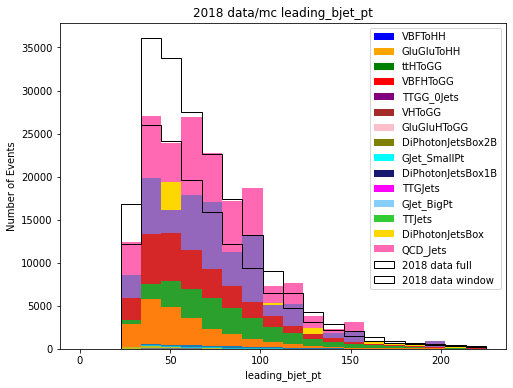

In [20]:
year = [2016, 2017, 2018, 'combine']

names = ['VBFToHH', 'GluGluToHH', 'ttHToGG', 'VBFHToGG', 'TTGG_0Jets', 'VHToGG', 'GluGluHToGG',
        'DiPhotonJetsBox2B', 'GJet_SmallPt', 'DiPhotonJetsBox1B',  'TTGJets',
        'GJet_BigPt', 'TTJets', 'DiPhotonJetsBox', 'QCD_Jets']

colors = ['blue', 'orange', 'green', 'red', 'purple', 
          'brown', 'pink', 'olive', 'cyan', 'midnightblue', 'magenta', 
          'lightskyblue', 'limegreen', 'gold', 'hotpink']

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_photon_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore']

ranges = [(0, 225), (0, 125), (0, 250), (100, 180),
         (0, 225), (0, 125), (0, 250), (20, 250),
         (0, 225), (0, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2)]

for y in range(len(year)):
    for x in range(len(plt_vars)):
        vals_0 = []
        vals_1 = []
        genweights_0 = []
        genweights_1 = []
        for df in dfs[y]:
            val = df.loc[:, plt_vars[x]].values
            genweight = df.loc[:, b'genweight'].values
            vals_0.append(val)
            genweights_0.append(genweight)
        for df in dfs_wind[y]:
            val = df.loc[:, plt_vars[x]].values
            genweight = df.loc[:, b'genweight'].values
            vals_1.append(val)
            genweights_1.append(genweight)
        data_vals_0 = data_dfs[y].loc[:, plt_vars[x]].values
        data_vals_1 = data_dfs_wind[y].loc[:, plt_vars[x]].values
        plt.figure()
        plt.hist(vals_0, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights_0, range = ranges[x])
        plt.hist(data_vals_0, bins=20, histtype='step', color = 'black', label=f'{year[y]} data full', range = ranges[x])
        plt.hist(vals_1, bins=20, histtype='bar', stacked = True, fill = True,  color = colors, weights = genweights_1, range = ranges[x])
        plt.hist(data_vals_1, bins=20, histtype='step', color = 'black', label=f'{year[y]} data window', range = ranges[x])
        plt.xlabel(plt_vars[x].decode("utf-8"))
        plt.ylabel("Number of Events")
        plt.title(f'{year[y]} data/mc {plt_vars[x].decode("utf-8")}')
        plt.legend(loc='best')
        figure = plt.gcf()
        figure.set_size_inches(8, 6)
        plt.savefig(fname = f'Plots/Data_MC_Plots/{year[y]}/overlap/overlap_{year[y]}_{plt_vars[x].decode("utf-8")}.png', format='png', dpi = 100)
        #plt.show()
        plt.close()

In [19]:
# data overlap - diphoton mass window
plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_photon_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore']

ranges = [(0, 225), (0, 125), (0, 250), (100, 180),
         (0, 225), (0, 125), (0, 250), (20, 250),
         (0, 225), (0, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2)]

for y in range(len(year)):
    for x in range(len(plt_vars)):
        data_vals_0 = data_dfs[y].loc[:, plt_vars[x]].values
        data_vals_1 = data_dfs_wind[y].loc[:, plt_vars[x]].values
        plt.figure()
        plt.hist(data_vals_0, bins=20, histtype='step', color = 'blue', label=f'{year[y]} data full', range = ranges[x])
        plt.hist(data_vals_1, bins=20, histtype='step', color = 'orange', label=f'{year[y]} data window', range = ranges[x])
        plt.xlabel(plt_vars[x].decode("utf-8"))
        plt.ylabel("Number of Events")
        plt.title(f'{year[y]} data/mc {plt_vars[x].decode("utf-8")}')
        plt.legend(loc='best')
        figure = plt.gcf()
        figure.set_size_inches(8, 6)
        plt.savefig(fname = f'Plots/Data_MC_Plots/{year[y]}/overlap/data/overlap_{year[y]}_{plt_vars[x].decode("utf-8")}.png', format='png', dpi = 100)
        #plt.show()
        plt.close()

/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib64/python3.6/site-packages/numpy/li

In [21]:
# data overlap - diphoton mass window - data only
plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_photon_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore']

ranges = [(0, 225), (0, 125), (0, 250), (100, 180),
         (0, 225), (0, 125), (0, 250), (20, 250),
         (0, 225), (0, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2)]

for y in range(len(year)):
    for x in range(len(plt_vars)):
        data_vals_0 = data_dfs[y].loc[:, plt_vars[x]].values
        data_vals_1 = data_dfs_wind[y].loc[:, plt_vars[x]].values
        plt.figure()
        plt.hist(data_vals_0, bins=20, histtype='step', color = 'blue', label=f'{year[y]} data full', range = ranges[x], density = True)
        plt.hist(data_vals_1, bins=20, histtype='step', color = 'orange', label=f'{year[y]} data window', range = ranges[x], density = True)
        plt.xlabel(plt_vars[x].decode("utf-8"))
        plt.ylabel("Number of Events")
        plt.title(f'{year[y]} data/mc {plt_vars[x].decode("utf-8")}')
        plt.legend(loc='best')
        figure = plt.gcf()
        figure.set_size_inches(8, 6)
        plt.savefig(fname = f'Plots/Data_MC_Plots/{year[y]}/overlap/data/data_dens_overlap_{year[y]}_{plt_vars[x].decode("utf-8")}.png', format='png', dpi = 100)
        #plt.show()
        plt.close()

/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib64/python3.6/site-packages/numpy/li

In [24]:
# overlap - diphoton mass window - MC only
plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_photon_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore']

ranges = [(0, 225), (0, 125), (0, 250), (100, 180),
         (0, 225), (0, 125), (0, 250), (20, 250),
         (0, 225), (0, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2)]

for y in range(len(year)):
    for i in range(len(dfs[y])):
        for x in range(len(plt_vars)):
            plt.figure
            plt.hist(dfs[y][i][plt_vars[x]], color='blue', bins=20, histtype='step', weights = dfs[y][i][b'genweight'], label=f'{year[y]} full {names[i]}', range= ranges[x], density=True)
            plt.hist(dfs_wind[y][i][plt_vars[x]], color='orange', bins=20, histtype='step', weights = dfs_wind[y][i][b'genweight'], label=f'{year[y]} window {names[i]}', range= ranges[x], density=True)
            plt.xlabel(plt_vars[x].decode("utf-8"))
            plt.ylabel("Number of Events")
            plt.title(f'full vs. wind {year[y]} {names[i]} {plt_vars[x].decode("utf-8")}')
            plt.legend(loc='best')
            plt.savefig(fname = f'Plots/MC_Vars_Plots/{year[y]}/overlap/full_wind_{year[y]}_{names[i]}_{plt_vars[x].decode("utf-8")}.png', format = 'png')
            #plt.show()
            plt.close()

/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib64/python3.6/site-packages/numpy/li

In [11]:
# nbjet == 2 selection

dfs_2016 = [VBFHH_df_2016, GluGluToHH_df_2016, ttHToGG_df_2016, VBFHToGG_df_2016, TTGG_0Jets_df_2016, VHToGG_df_2016,
       GluGluHToGG_df_2016, DiPhotonJetsBox2B_df_2016, GJet_SmallPt_df_2016,  DiPhotonJetsBox1B_df_2016, 
       TTGJets_df_2016, GJet_BigPt_df_2016, TTJets_df_2016, DiPhotonJetsBox_df_2016, QCD_Jets_df_2016]

dfs_2017 = [VBFHH_df_2017, GluGluToHH_df_2017, ttHToGG_df_2017, VBFHToGG_df_2017, TTGG_0Jets_df_2017, VHToGG_df_2017,
       GluGluHToGG_df_2017, DiPhotonJetsBox2B_df_2017, GJet_SmallPt_df_2017,  DiPhotonJetsBox1B_df_2017, 
       TTGJets_df_2017, GJet_BigPt_df_2017, TTJets_df_2017, DiPhotonJetsBox_df_2017, QCD_Jets_df_2017]

dfs_2018 = [VBFHH_df_2018, GluGluToHH_df_2018, ttHToGG_df_2018, VBFHToGG_df_2018, TTGG_0Jets_df_2018, VHToGG_df_2018,
       GluGluHToGG_df_2018, DiPhotonJetsBox2B_df_2018, GJet_SmallPt_df_2018,  DiPhotonJetsBox1B_df_2018, 
       TTGJets_df_2018, GJet_BigPt_df_2018, TTJets_df_2018, DiPhotonJetsBox_df_2018, QCD_Jets_df_2018]

dfs_combine = [VBFHH_df, GluGluToHH_df, ttHToGG_df, VBFHToGG_df, TTGG_0Jets_df, VHToGG_df,
       GluGluHToGG_df, DiPhotonJetsBox2B_df, GJet_SmallPt_df,  DiPhotonJetsBox1B_df, 
       TTGJets_df, GJet_BigPt_df, TTJets_df, DiPhotonJetsBox_df, QCD_Jets_df]

dfs = [dfs_2016, dfs_2017, dfs_2018, dfs_combine]

dfs_2016_nbjet_2 = []
dfs_2017_nbjet_2 = []
dfs_2018_nbjet_2 = []
dfs_combine_nbjet_2 = []
dfs_nbjet_2 = [dfs_2016_nbjet_2, dfs_2017_nbjet_2, dfs_2018_nbjet_2, dfs_combine_nbjet_2]

for y in range(len(dfs)):
    for i in range(len(dfs_2016)):
        df_nbjet_2 = dfs[y][i][dfs[y][i][b'nbjet'] == 2]
        dfs_nbjet_2[y].append(df_nbjet_2)

data_dfs = [data_2016_good_df, data_2017_good_df, data_2018_good_df, data_good_df]
data_dfs_nbjet_2 = []
for df in data_dfs:
    df_nbjet_2 = df[df[b'nbjet'] == 2]
    data_dfs_nbjet_2.append(df_nbjet_2)

In [12]:
# nbjet == 2 plots

year = [2016, 2017, 2018, 'combine']

names = ['VBFToHH', 'GluGluToHH', 'ttHToGG', 'VBFHToGG', 'TTGG_0Jets', 'VHToGG', 'GluGluHToGG',
        'DiPhotonJetsBox2B', 'GJet_SmallPt', 'DiPhotonJetsBox1B',  'TTGJets',
        'GJet_BigPt', 'TTJets', 'DiPhotonJetsBox', 'QCD_Jets']

colors = ['blue', 'orange', 'green', 'red', 'purple', 
          'brown', 'pink', 'olive', 'cyan', 'midnightblue', 'magenta', 
          'lightskyblue', 'limegreen', 'gold', 'hotpink']

plt_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass',
           b'leading_bjet_pt', b'subleading_bjet_pt', b'dibjet_pt', b'dibjet_mass',
           b'leading_bjet_pt_corr', b'subleading_bjet_pt_corr', b'dibjet_pt_corr', b'dibjet_mass_corr',
           b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr',
           b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
           b'diphoton_eta', b'photon_delR',
           b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_photon_eta',
           b'dibjet_eta', b'bjet_delR',
           b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore']

ranges = [(0, 225), (0, 125), (0, 250), (100, 180),
         (0, 225), (0, 125), (0, 250), (20, 250),
         (0, 225), (0, 125), (0, 250), (70, 190),
         (0, 2), (0, 3), (0, 2),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 3.8),
         (-3.2, 3.2), (-2.8, 2.8), (-3.2, 3.2), (-2.8, 2.8),
         (-6, 6), (0.5, 5),
         (0, 1), (0, 1), (0, 2)]

for y in range(len(year)):
    for x in range(len(plt_vars)):
        vals = []
        genweights = []
        for df in dfs_nbjet_2[y]:
            val = df.loc[:, plt_vars[x]].values
            genweight = df.loc[:, b'genweight'].values
            vals.append(val)
            genweights.append(genweight)
        data_vals = data_dfs_nbjet_2[y].loc[:, plt_vars[x]].values
        plt.figure()
        plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = ranges[x])
        plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'{year[y]} data', range = ranges[x])
        plt.xlabel(plt_vars[x].decode("utf-8"))
        plt.ylabel("Number of Events")
        plt.title(f'{year[y]} data/mc {plt_vars[x].decode("utf-8")}')
        plt.legend(loc='best')
        figure = plt.gcf()
        figure.set_size_inches(8, 6)
        plt.savefig(fname = f'Plots/Data_MC_Plots/{year[y]}/nbjet=2/nbjet_2_{year[y]}_{plt_vars[x].decode("utf-8")}.png', format='png', dpi = 100)
        #plt.show()
        plt.close()

/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib64/python3.6/site-packages/numpy/li